In [58]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

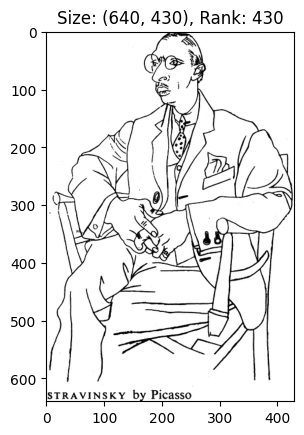

In [59]:
url = "https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png"
strav = skimage.io.imread(url) / 255

fig, ax = plt.subplots()
ax.set_title(f"Size: {strav.shape}, Rank: {np.linalg.matrix_rank(strav)}")
ax.imshow(strav, cmap="gray")
plt.show()

In [60]:
u, sigma, vt = np.linalg.svd(strav) # Note that `sigma` is already sorted.

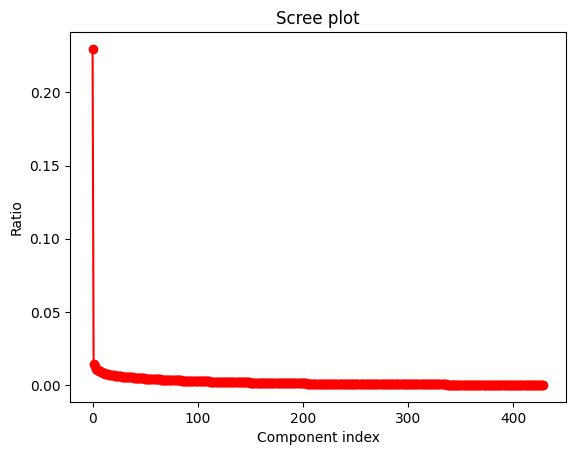

In [61]:
# Scree plot.
fig, ax = plt.subplots()
ax.set_title("Scree plot")
ax.set_xlabel("Component index")
ax.set_ylabel("Ratio")
ax.plot(range(len(sigma)), sigma / np.sum(sigma), "ro-")
plt.show()

In [62]:
layers = [np.zeros_like(strav)]
print(f"u shape: {u[:, 1].shape}")
print(f"vt shape: {vt[1, :].shape}")
for i in range(4):
    layers.append(sigma[i] * np.outer(u[:, i], vt[i, :]))

u shape: (640,)
vt shape: (430,)


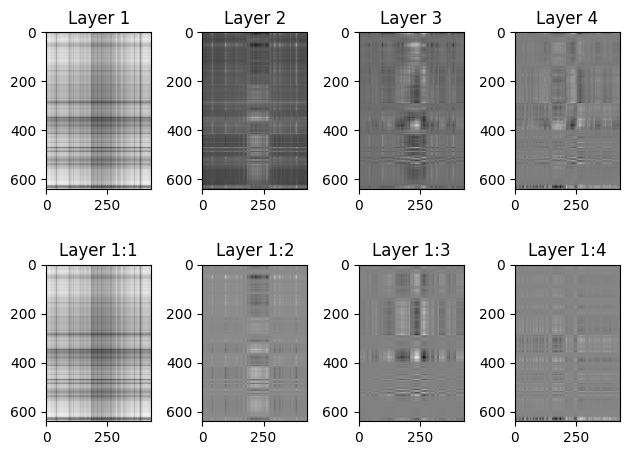

In [63]:
fig, axs = plt.subplots(2, 4)
for i in range(4):
    axs[0][i].set_title(f"Layer {i + 1}")
    axs[0][i].imshow(layers[i + 1] - layers[i], cmap="gray")
    axs[1][i].set_title(f"Layer 1:{i + 1}")
    axs[1][i].imshow(layers[i + 1], cmap="gray")
fig.tight_layout()
plt.show()